# <font color = "BLUE"> Projeto 3 - Identificador de pokémons para uma batalha </font>

#### Integrantes: 

Fernando Elias Sanches
   
Maurício Hiroki Ando


Theo Barbara Rodriguez


## <font color = "BLUE"> Importando os dados </font> 

In [26]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

pokedex=pd.read_csv("Pokemon.csv")

## <font color = "BLUE"> Analisando os dados </font>

Pokémons disponíveis:800


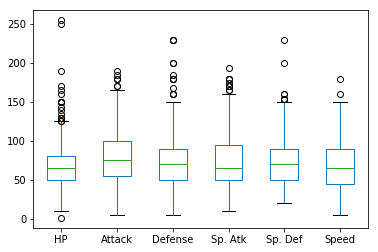

In [33]:
# del(pokedex["#"])
# del(pokedex["Total"])
# del(pokedex["Generation"])
# del(pokedex["Legendary"])
pokedex.plot.box();
print("Pokémons disponíveis:{}".format(len(pokedex)))

Nota-se que, através da análise dos atributos de ataque, defesa, velocidade, HP, ataque especial, defesa especial; podemos observar que a grande maioria dos pokémons se encontram dentro do interquantil. Podemos ver que são poucos os pokémons que estão fora da curva em cada atributo, dado que existem cerca de 800 pokémons no dataset.

## <font color = "BLUE"> Clusterização dos dados </font>

## <font color="BLUE"> Identificando os ponto fracos dos pokémons </font>

In [4]:
deck=6

Pokemons={'Fairy':[],'Grass':[],'Fire':[],'Flying':[],'Dark':[],'Ghost':[],'Psychic':[],'Bug':[],'Dragon':[],'Ice':[],\
          'Electric':[],'Poison':[],'Rock':[],'Ground':[],'Steel':[],'Normal':[],'Water':[],'Fighting':[]}

#Separação do pokémon por tipo
def ClassificaPokemon(dicionario):
    for tipo in dicionario:
        for pokemon in pokedex.Name:
            linha=pokedex[pokedex.Name==pokemon]
            if linha['Type 1'].all()==tipo or linha['Type 2'].all()==tipo:
                dicionario[tipo].append(pokemon)
ClassificaPokemon(Pokemons)

In [5]:
#Dado um pokemon, identifica-se seu tipo composto (se tiver um tipo 2, por exemplo, tipo fire e tipo fighting)
def ClassificaTipoComposto(pokemon):
    tipo1=pokedex[pokedex.Name==pokemon]['Type 1'].all()
    tipo2=pokedex[pokedex.Name==pokemon]['Type 2'].all()
    return tipo1,tipo2


#Define o ponto fraco de cada tipo de pokemon. REferencias de fraqueza baseadas no site: https://pokemondb.net/type
def PontoFracoPorTipo(tipo):
    if tipo=='Fairy':
        ponto_fraco=['Poison','Steel']
        ponto_forte=['Fighting','Bug','Dark']
        no_effect=['Dragon']
    elif tipo=='Ground':
        ponto_fraco=['Water','Grass','Ice',]
        ponto_forte=['Fighting','Bug','Dark']
        no_effect=['Electric']
    elif tipo=='Fire':
        ponto_fraco=['Water','Ground','Rock']
        ponto_forte=['Fire','Grass','Ice','Bug','Steel','Fairy']
        no_effect=['None']
    elif tipo=='Water':
        ponto_fraco=['Electric','Grass']
        ponto_forte=['Fire','Water','Steel','Ice']
        no_effect=['None']
    elif tipo=='Flying':
        ponto_fraco=['Electric','Ice','Rock']
        ponto_forte=['Grass','Fighting','Bug']
        no_effect=['Ground']
    elif tipo=='Dark':
        ponto_fraco=['Fighting','Bug','Fairy']
        ponto_forte=['Ghost','Dark']
        no_effect=['Psychic']
    elif tipo=='Ghost':
        ponto_fraco=['Ghost','Dark']
        ponto_forte=['Poison','Bug']
        no_effect=['Normal','Fighting']
    elif tipo=='Psychic':
        ponto_fraco=['Bug','Ghost','Dark']
        ponto_forte=['Fighting','Psychic']
        no_effect=['None']
    elif tipo=='Bug':
        ponto_fraco=['Fire', 'Flying','Rock']
        ponto_forte=['Grass','Fighting','Ground']
        no_effect=['None']
    elif tipo=='Ice':
        ponto_fraco=['Fighting','Fire','Rock','Steel']
        ponto_forte=['Ice']
        no_effect=['None']
    elif tipo=='Electric':
        ponto_fraco=['Ground']
        ponto_forte=['Electric','Steel']
        no_effect=['None']
    elif tipo=='Poison':
        ponto_fraco=['Psychic','Ground']
        ponto_forte=['Grass','Fighting','Poison','Bug','Fairy']
        no_effect=['None']
    elif tipo=='Rock':
        ponto_fraco=['Fighting','Ground','Water','Steel','Grass']
        ponto_forte=['Normal','Fire','Poison','Flying']
        no_effect=['None']
    elif tipo=='Grass':
        ponto_fraco=['Fire','Flying','Ice','Poison','Bug']
        ponto_forte=['Grass','Water','Electric','Ground']
        no_effect=['None']
    elif tipo=='Steel':
        ponto_fraco=['Fire','Fighting','Ground']
        ponto_forte=['Normal','Grass','Ice','Flying','Psychic','Bug','Rock','Dragon','Steel','Fairy']
        no_effect=['Poison']
    elif tipo=='Normal':
        ponto_fraco=['Fighting']
        ponto_forte=['None']
        no_effect=['Ghost']
    elif tipo=='Fighting':
        ponto_fraco=['Flying','Psychic','Fairy']
        ponto_forte=['Bug','Rock','Dark']
        no_effect=['None']
    elif tipo=='Water':
        ponto_fraco=['Grass','Electric']
        ponto_forte=['Water','Ice','Fire','Steel']
        no_effect=['None']
    else:
        ponto_fraco=['None']
        ponto_forte=['None']
        no_effect=['None']
    return ponto_fraco,ponto_forte,no_effect

In [6]:
#Dado um pokemon e seus tipos, mostra o ponto fraco
def PontoFraco(pokemon):
    tipos=ClassificaTipoComposto(pokemon)
    tipo1=tipos[0]
    tipo2=tipos[1]
    first=PontoFracoPorTipo(tipo1)
    second=PontoFracoPorTipo(tipo2)
    ponto_fraco_temporario=set(first[0]+second[0])
    ponto_fraco_real=[]
    for elemento in ponto_fraco_temporario:
        if elemento not in second[1]:
            if elemento not in second[2]:
                if elemento not in first[1]:
                    if elemento not in first[2]:
                        ponto_fraco_real.append(elemento)
    return "{}'s weakness: {} ".format(pokemon,ponto_fraco_real)
PontoFraco('Gyarados')

"Gyarados's weakness: ['Rock', 'Electric'] "

In [7]:
#Comparar de dois a dois (combinação de 6 dois a dois)
dados_entrada = pokedex.loc[:,("Attack", "Defense", "Sp. Atk","Sp. Def",'Speed',"HP")]
two_means = cluster.MiniBatchKMeans(n_clusters=2)
two_means.fit(dados_entrada)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=2,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [8]:
saida = two_means.predict(dados_entrada)
saida

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,

In [9]:
conjunto = dados_entrada.copy()
conjunto["saida"] = saida

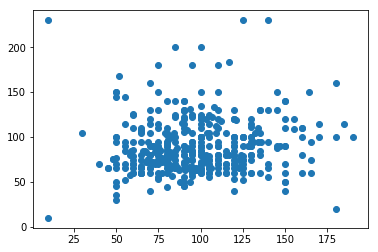

In [10]:
# plt3d = plt.figure().gca(projection="3d")
grupo0 = conjunto[conjunto.saida==0]
grupo1 = conjunto[conjunto.saida==1]

plt.plot(grupo0.Attack, grupo0.Defense,"o")
plt.show()

# plt3d.scatter(grupo0["Attack"], grupo0["Defense"], grupo0["HP"], color="r")
# plt3d.scatter(grupo1["Attack"], grupo1["Defense"], grupo1["HP"], color="g")
# plt3d.scatter(grupo2["Attack"], grupo2["Defense"], grupo2["HP"], color="b")

## <font color = "BLUE"> Conclusão 